In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load file into a DataFrame
df_exams = pd.read_csv('./datasets/diabetes_exams.csv')

In [16]:
# Visualize the data
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_patient  100 non-null    int64 
 1   gender      100 non-null    object
 2   age         100 non-null    int64 
 3   weight      100 non-null    int64 
 4   height      100 non-null    int64 
 5   result      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [17]:
# Show first 10 rows
df_exams.head(10)

,id_patient,gender,age,weight,height,result
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [18]:
df_exams['gender'].unique()

array(['M', 'F'], dtype=object)

In [19]:
# Remmove id_patient column
df_exams.drop('id_patient', axis=1, inplace=True)

In [20]:
# Convert a categorical variable (gender) into numerical, using one-hot encoding
df_exams = pd.get_dummies(df_exams, columns=['gender'], dtype='int64')

In [21]:
df_exams.head(10)

,age,weight,height,result,gender_F,gender_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

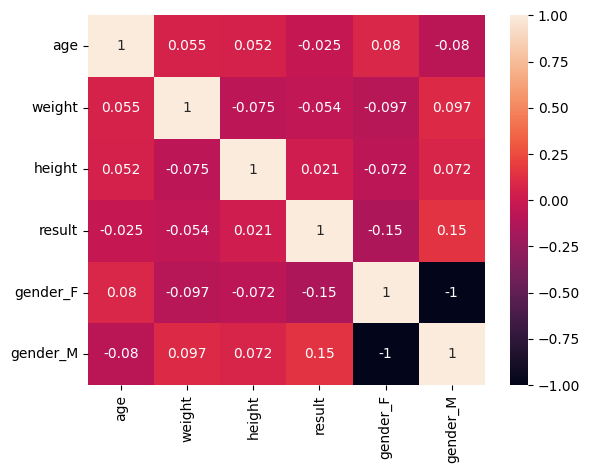

In [22]:
# Present Heat Map with correlation between variables
sns.heatmap(df_exams.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

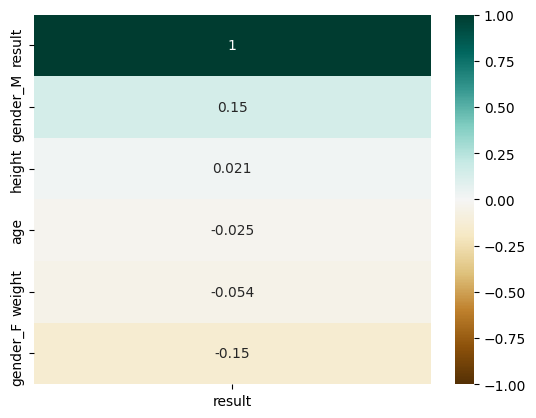

In [23]:
# Correlation map with the target variable
sns.heatmap(df_exams.corr()[['result']].sort_values(by='result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='result', ylabel='age'>,
        <Axes: xlabel='gender_F', ylabel='age'>,
        <Axes: xlabel='gender_M', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='result', ylabel='weight'>,
        <Axes: xlabel='gender_F', ylabel='weight'>,
        <Axes: xlabel='gender_M', ylabel='weight'>],
       [<Axes: xlabel='age', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='result', ylabel='height'>,
        <Axes: xlabel='gender_F', ylabel='height'>,
        <Axes: xlabel='gender_M', ylabel='height'>],
       [<Axes: xlabel='age', ylabel='result'>,
        <Axes: xlabel='weight', ylabel='result'>,
        <Axes: 

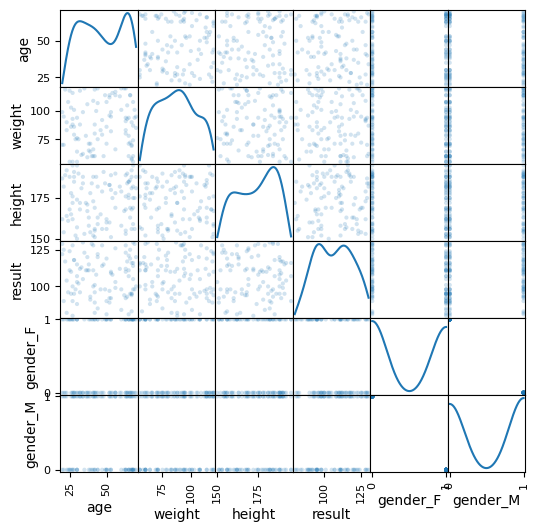

In [24]:
# Scatter Plot with distribution
pd.plotting.scatter_matrix(df_exams, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>]], dtype=object)

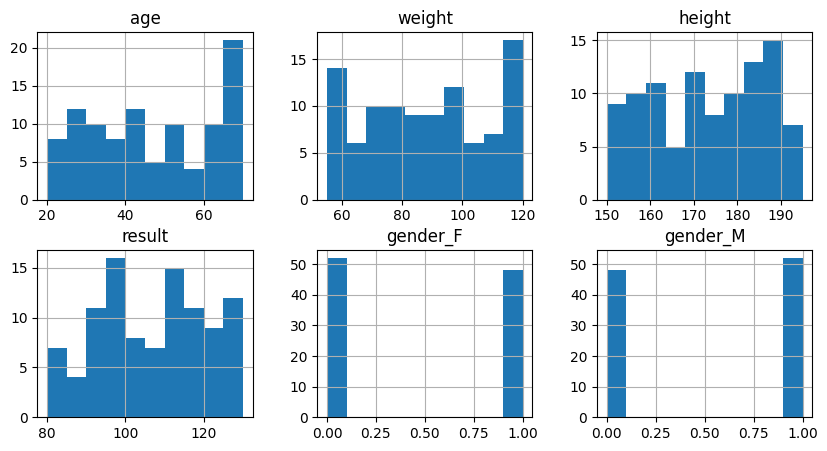

In [25]:
# Histogram of all variables
df_exams.hist(layout=(2, 3), figsize=(10, 5))